In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv("D:/khai thác dữ liệu/thực hành khai thác dữ liệu/Lab04_Data/adult.data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_test = pd.read_csv("D:/khai thác dữ liệu/thực hành khai thác dữ liệu/Lab04_Data/adult.test.csv")

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   education       16281 non-null  object
 3   education-num   16281 non-null  int64 
 4   marital-status  16281 non-null  object
 5   occupation      16281 non-null  object
 6   relationship    16281 non-null  object
 7   race            16281 non-null  object
 8   sex             16281 non-null  object
 9   capital-gain    16281 non-null  int64 
 10  capital-loss    16281 non-null  int64 
 11  hours-per-week  16281 non-null  int64 
 12  native-country  16281 non-null  object
 13  income          16281 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [7]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_test = df_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
df.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   education       16281 non-null  object
 3   education-num   16281 non-null  int64 
 4   marital-status  16281 non-null  object
 5   occupation      15315 non-null  object
 6   relationship    16281 non-null  object
 7   race            16281 non-null  object
 8   sex             16281 non-null  object
 9   capital-gain    16281 non-null  int64 
 10  capital-loss    16281 non-null  int64 
 11  hours-per-week  16281 non-null  int64 
 12  native-country  16007 non-null  object
 13  income          16281 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [11]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = missing_data / len(df)*100
    print(f"Column: {col}: has {missing_percent}% missing_data")

Column: age: has 0.0% missing_data
Column: workclass: has 5.638647461687294% missing_data
Column: fnlwgt: has 0.0% missing_data
Column: education: has 0.0% missing_data
Column: education-num: has 0.0% missing_data
Column: marital-status: has 0.0% missing_data
Column: occupation: has 5.660145572924664% missing_data
Column: relationship: has 0.0% missing_data
Column: race: has 0.0% missing_data
Column: sex: has 0.0% missing_data
Column: capital-gain: has 0.0% missing_data
Column: capital-loss: has 0.0% missing_data
Column: hours-per-week: has 0.0% missing_data
Column: native-country: has 1.7904855501980899% missing_data
Column: income: has 0.0% missing_data


In [12]:
for col in df_test.columns:
    missing_data_test = df_test[col].isna().sum()
    missing_percent_test = missing_data_test / len(df_test)*100
    print(f"Column: {col}: has {missing_percent_test}% missing_data")

Column: age: has 0.0% missing_data
Column: workclass: has 5.914870093974572% missing_data
Column: education: has 0.0% missing_data
Column: education-num: has 0.0% missing_data
Column: marital-status: has 0.0% missing_data
Column: occupation: has 5.933296480560162% missing_data
Column: relationship: has 0.0% missing_data
Column: race: has 0.0% missing_data
Column: sex: has 0.0% missing_data
Column: capital-gain: has 0.0% missing_data
Column: capital-loss: has 0.0% missing_data
Column: hours-per-week: has 0.0% missing_data
Column: native-country: has 1.6829433081506049% missing_data
Column: income: has 0.0% missing_data


<Axes: >

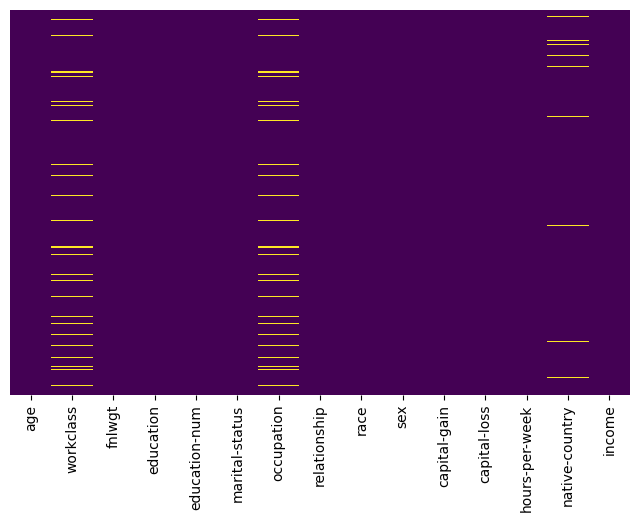

In [13]:
fig, ax = plt.subplots(figsize = (8,5)) #is to create a figure object with a given size
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df_test.dropna(inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   education       15060 non-null  object
 3   education-num   15060 non-null  int64 
 4   marital-status  15060 non-null  object
 5   occupation      15060 non-null  object
 6   relationship    15060 non-null  object
 7   race            15060 non-null  object
 8   sex             15060 non-null  object
 9   capital-gain    15060 non-null  int64 
 10  capital-loss    15060 non-null  int64 
 11  hours-per-week  15060 non-null  int64 
 12  native-country  15060 non-null  object
 13  income          15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [16]:
if 'fnlwgt' in df.columns:
    df.drop(columns=['fnlwgt'], inplace=True)

In [17]:
data = pd.concat([df, df_test], axis=0)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for column in data.columns:
    if data[column].dtype == 'object':
        if data[column].nunique() <= 10:  
            data = pd.get_dummies(data, columns=[column], prefix=[column])
        else:  
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column].astype(str))

<Axes: >

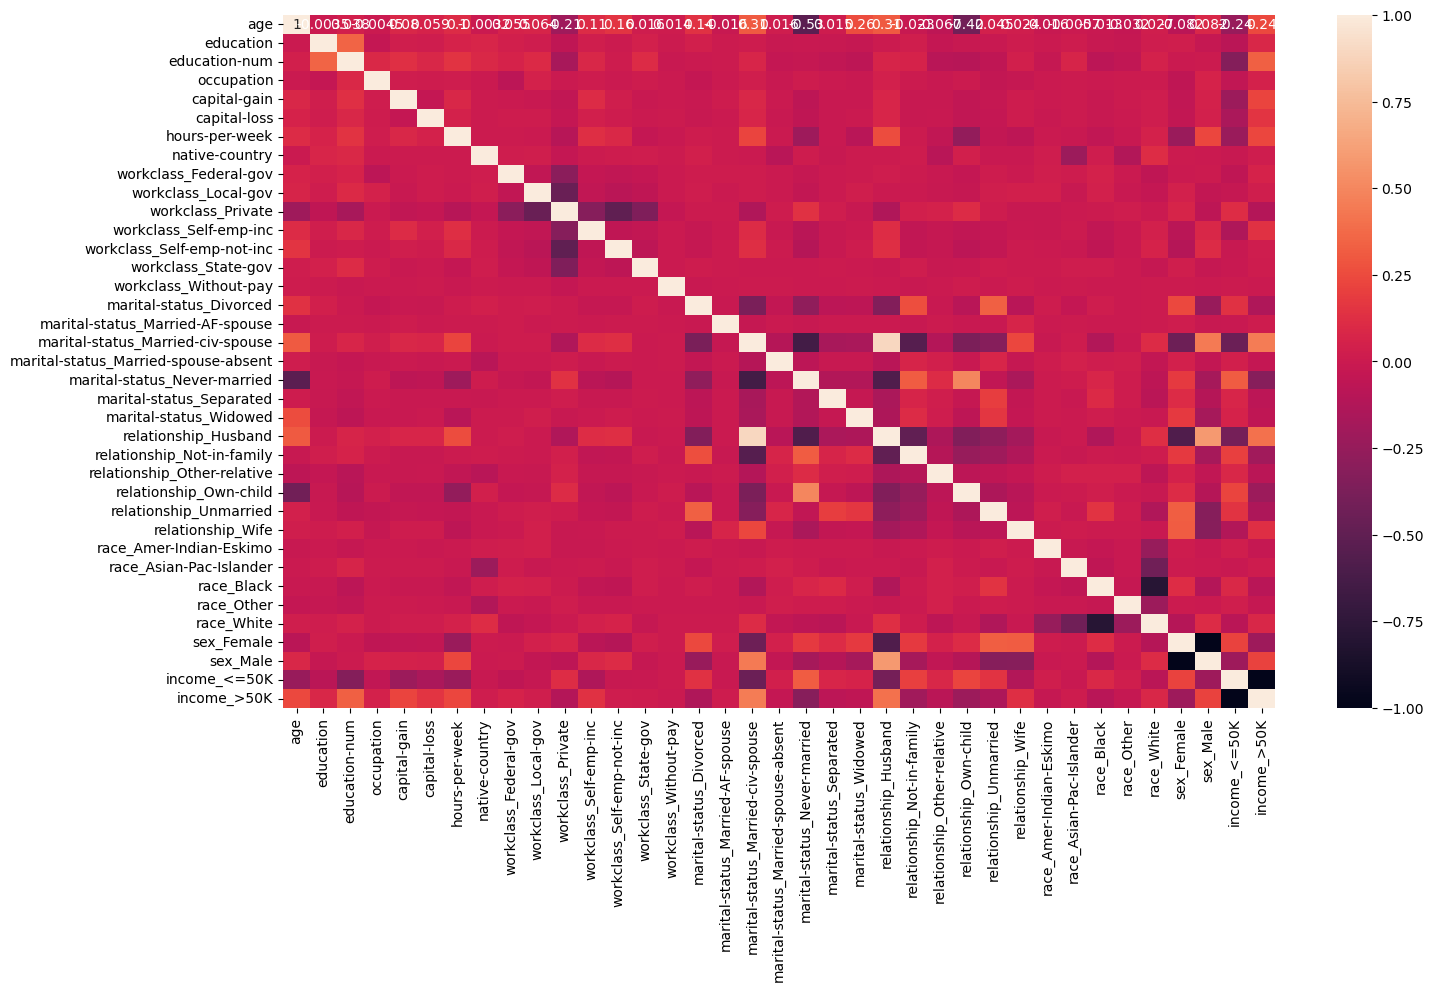

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson') ,annot=True)

In [22]:
data.head()

age  education  education-num  occupation  capital-gain  capital-loss  \
0   39          9             13           0          2174             0   
1   50          9             13           3             0             0   
2   38         11              9           5             0             0   
3   53          1              7           5             0             0   
4   28          9             13           9             0             0   

   hours-per-week  native-country  workclass_Federal-gov  workclass_Local-gov  \
0              40              38                  False                False   
1              13              38                  False                False   
2              40              38                  False                False   
3              40              38                  False                False   
4              40               4                  False                False   

   ...  relationship_Wife  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
0  ...              False                    False                    False   
1  ...              False                    False                    False   
2  ...              False                    False                    False   
3  ...              False                    False                    False   
4  ...               True                    False                    False   

   race_Black  race_Other  race_White  sex_Female  sex_Male  income_<=50K  \
0       False       False        True       False      True          True   
1       False       False        True       False      True          True   
2       False       False        True       False      True          True   
3        True       False       False       False      True          True   
4        True       False       False        True     False          True   

   income_>50K  
0        False  
1        False  
2        False  
3        False  
4        False  

[5 rows x 37 columns]

In [23]:
columns = ['income_<=50K','income_>50K']
features = data.drop(columns, axis = 1)
labels = data[columns]

In [24]:
features.head()

age  education  education-num  occupation  capital-gain  capital-loss  \
0   39          9             13           0          2174             0   
1   50          9             13           3             0             0   
2   38         11              9           5             0             0   
3   53          1              7           5             0             0   
4   28          9             13           9             0             0   

   hours-per-week  native-country  workclass_Federal-gov  workclass_Local-gov  \
0              40              38                  False                False   
1              13              38                  False                False   
2              40              38                  False                False   
3              40              38                  False                False   
4              40               4                  False                False   

   ...  relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0  ...                   False                   False              False   
1  ...                   False                   False              False   
2  ...                   False                   False              False   
3  ...                   False                   False              False   
4  ...                   False                   False               True   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                    False                    False       False       False   
1                    False                    False       False       False   
2                    False                    False       False       False   
3                    False                    False        True       False   
4                    False                    False        True       False   

   race_White  sex_Female  sex_Male  
0        True       False      True  
1        True       False      True  
2        True       False      True  
3       False       False      True  
4       False        True     False  

[5 rows x 35 columns]

In [25]:
labels.head()

income_<=50K  income_>50K
0          True        False
1          True        False
2          True        False
3          True        False
4          True        False

In [26]:
features.select_dtypes(exclude=['int64']).columns

Index(['education', 'occupation', 'native-country', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male'],
      dtype='object')

In [27]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
16275   33             13             0             0              40   
16276   39             13             0             0              36   
16278   38             13             0             0              50   
16279   44             13          5455             0              40   
16280   35             13             0             0              60   

       education_0  education_1  education_2  education_3  education_4  ...  \
0            False        False        False        False        False  ...   
1            False        False        False        False        False  ...   
2            False        False        False        False        False  ...   
3            False         True        False        False        False  ...   
4            False        False        False        False        False  ...   
...            ...          ...          ...          ...          ...  ...   
16275        False        False        False        False        False  ...   
16276        False        False        False        False        False  ...   
16278        False        False        False        False        False  ...   
16279        False        False        False        False        False  ...   
16280        False        False        False        False        False  ...   

       race_Black_False  race_Black_True  race_Other_False  race_Other_True  \
0                  True            False              True            False   
1                  True            False              True            False   
2                  True            False              True            False   
3                 False             True              True            False   
4                 False             True              True            False   
...                 ...              ...               ...              ...   
16275              True            False              True            False   
16276              True            False              True            False   
16278              True            False              True            False   
16279              True            False              True            False   
16280              True            False              True            False   

       race_White_False  race_White_True  sex_Female_False  sex_Female_True  \
0                 False             True              True            False   
1                 False             True              True            False   
2                 False             True              True            False   
3                  True            False              True            False   
4                  True            False             False             True   
...                 ...              ...               ...              ...   
16275             False             True              True            False   
16276             False             True             False             True   
16278             False             True              True            False   
16279              True            False              True            False   
16280             False             True              True            False   

       sex_Male_False  sex_Male_True  
0               False           True  
1               False           True  
2               False           True  
3               False           True  
4                True          False  
...               ...            ...  
16275     

In [28]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

In [29]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred, zero_division=1))

Accuracy:  0.8058432934926959
Report:                precision    recall  f1-score   support

           0       0.88      0.87      0.88     11360
           1       0.63      0.61      0.62      3700

   micro avg       0.82      0.81      0.81     15060
   macro avg       0.76      0.74      0.75     15060
weighted avg       0.82      0.81      0.81     15060
 samples avg       0.83      0.81      0.81     15060



In [31]:
if len(np.shape(y_test)) > 1:
    y_test = np.argmax(y_test, axis=1)
if len(np.shape(tree_pred)) > 1:
    tree_pred = np.argmax(tree_pred, axis=1)
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

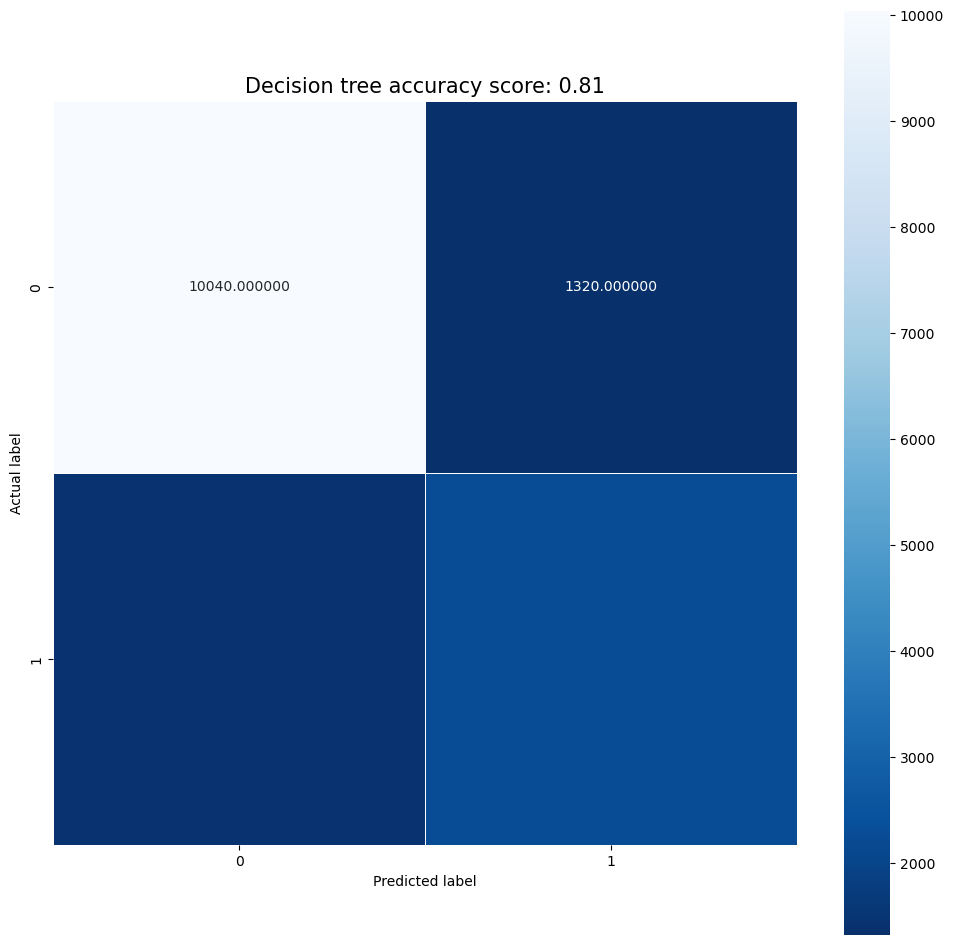

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt = "f", linewidths=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision tree accuracy score: {0:.2f}'.format(tree_score)
plt.title(title, size = 15);
plt.show();

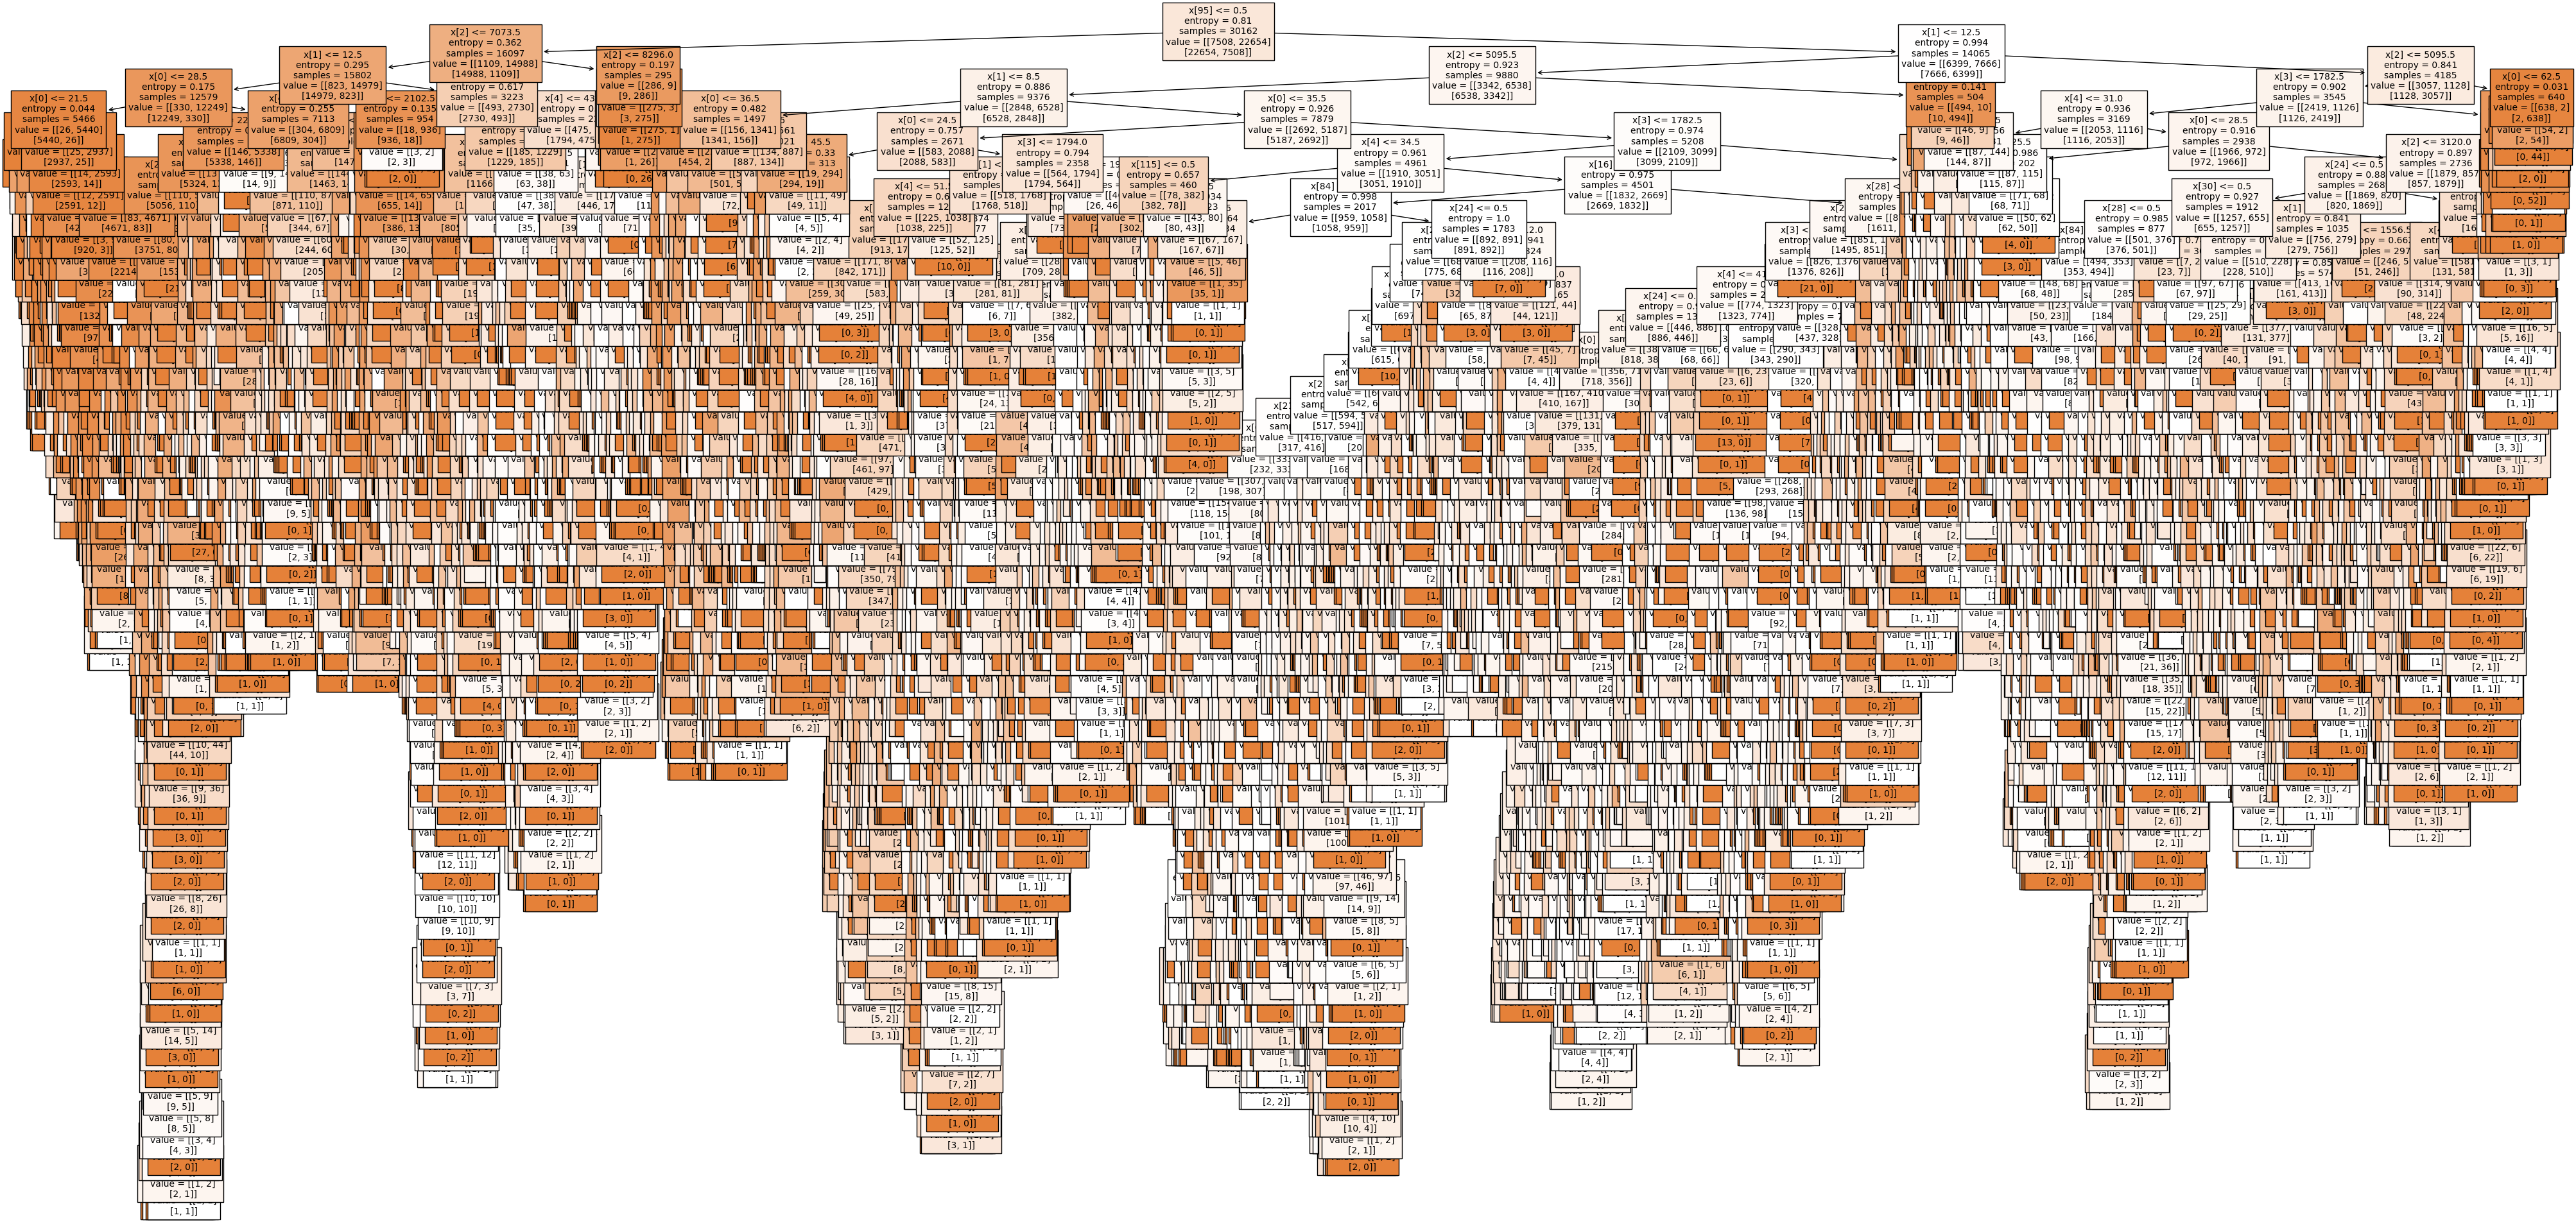

In [33]:
fix, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show();

In [37]:
clf2 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Accuracy:  0.8108897742363878
Confusion Matrix:
 [[9984 1376]
 [1472 2228]]
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     11360
           1       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



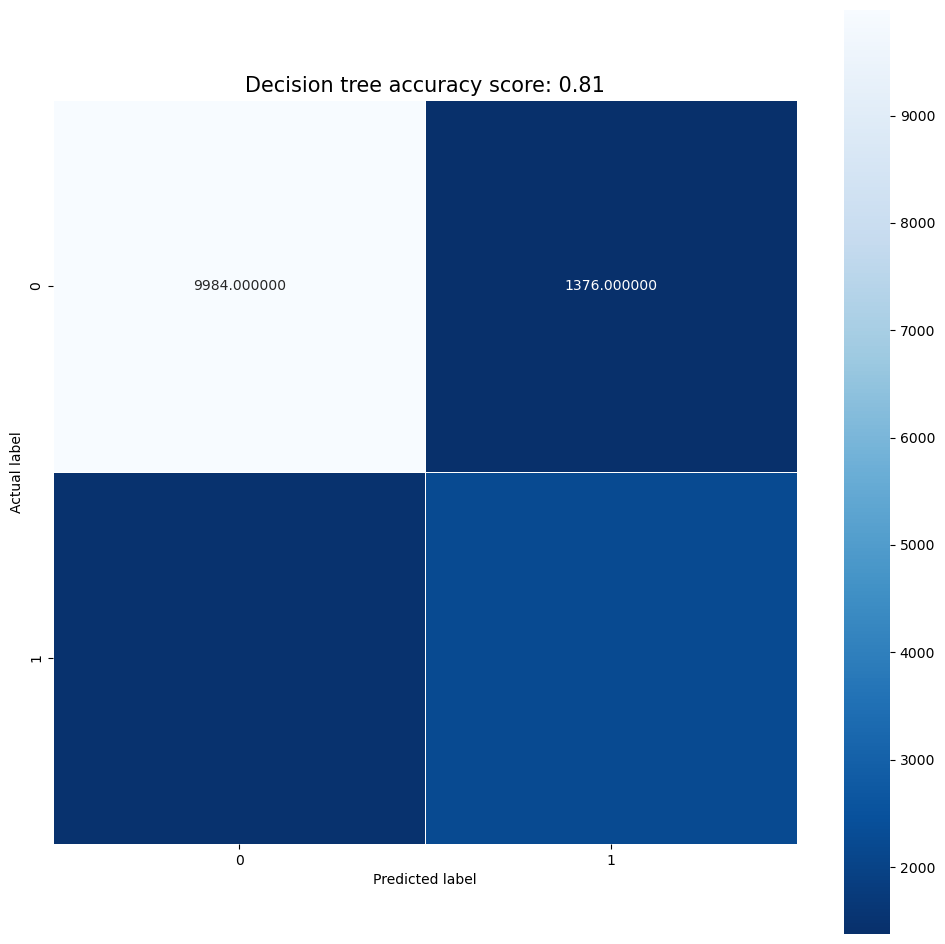

In [43]:

tree_pred2 = clf2.predict(X_test)
if len(np.shape(y_test)) > 1 and np.shape(y_test)[1] > 1:
    y_test = np.argmax(y_test, axis=1)
if len(np.shape(tree_pred2)) > 1 and np.shape(tree_pred2)[1] > 1:
    tree_pred2 = np.argmax(tree_pred2, axis=1)
tree_score2 = accuracy_score(y_test, tree_pred2)
print("Accuracy: ", tree_score2)
tree_cm2 = confusion_matrix(y_test, tree_pred2)
print("Confusion Matrix:\n", tree_cm2)
print("Classification Report:\n")
print(classification_report(y_test, tree_pred2, zero_division=1))
plt.figure(figsize=(12,12));
sns.heatmap(tree_cm2, annot=True, fmt="f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision tree accuracy score: {0:.2f}'.format(tree_score2)
plt.title(title, size=15);
plt.show();


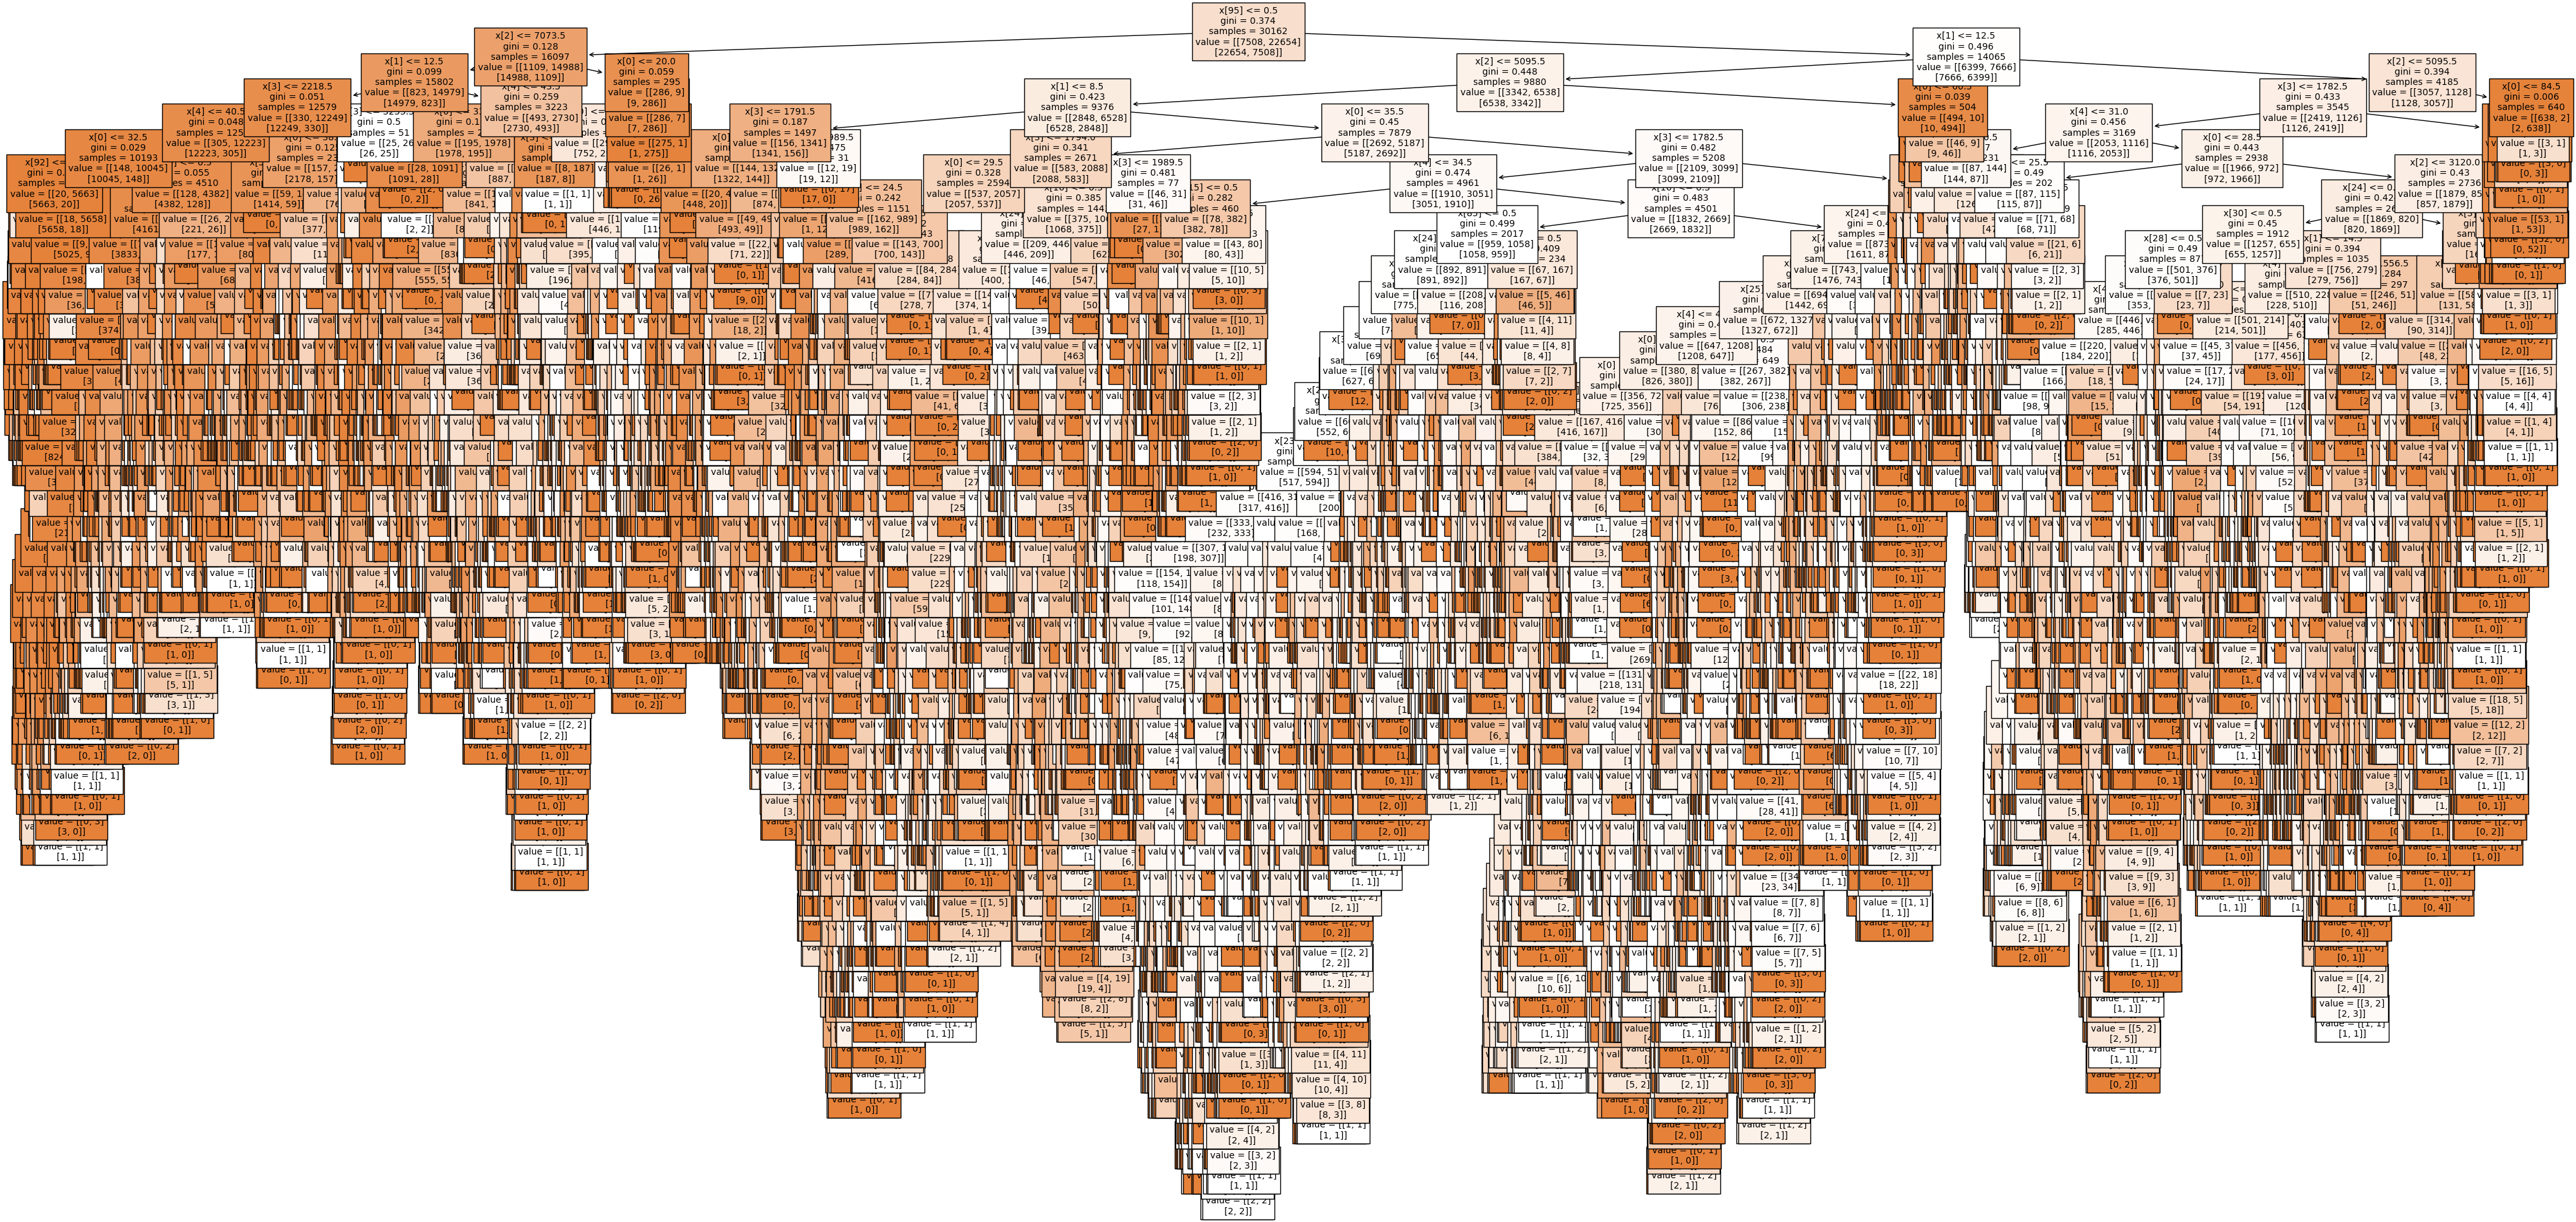

In [44]:
fix, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf2,filled=True,fontsize=10)
plt.savefig('decision_tree2',dpi=100)
plt.show();

In [48]:
y_train = y_train.ravel()
y_test = y_test.ravel()
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [49]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.7481407702523241
Report:                precision    recall  f1-score   support

           0       0.95      0.70      0.81     11360
           1       0.49      0.89      0.63      3700

    accuracy                           0.75     15060
   macro avg       0.72      0.80      0.72     15060
weighted avg       0.84      0.75      0.77     15060



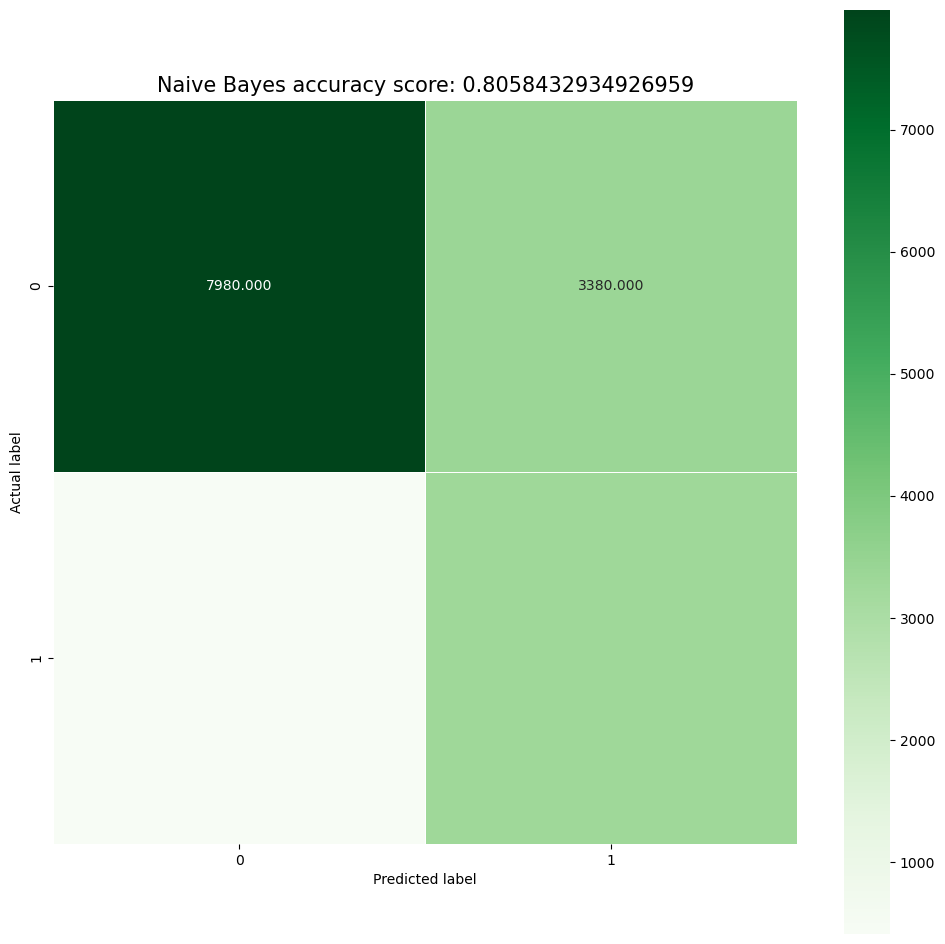

In [50]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt = ".3f", linewidths=.5, square=True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes accuracy score: {0}'.format(tree_score)
plt.title(title, size = 15);
plt.show();

# Decision tree và Naive bayes cho ra accuracy score tương đương nhau 
# Decision tree có điểm recall cao hơn so với Naive bayes
# persision của decision tree đều hơn naive bayes 